In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import plotly
from skimage import io
from skimage import morphology as morp
import plotly.express as px
import plotly.graph_objects as go

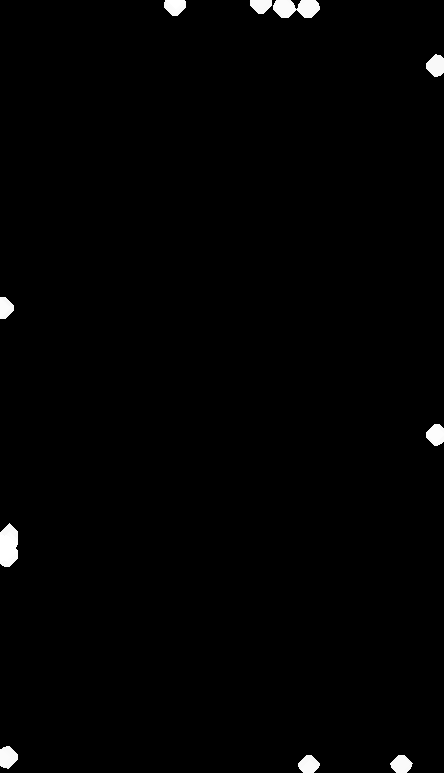

In [0]:
I = cv2.imread('coins.jpg', cv2.IMREAD_GRAYSCALE)
# cv2_imshow(I)

kernel = np.array([
          [0,0,0,0,1,0,0,0,0],
          [0,0,0,1,1,1,0,0,0],
          [0,0,1,1,1,1,1,0,0],
          [0,1,1,1,1,1,1,1,0],
          [1,1,1,1,1,1,1,1,1],
          [0,1,1,1,1,1,1,1,0],
          [0,0,1,1,1,1,1,0,0],
          [0,0,0,1,1,1,0,0,0],
          [0,0,0,0,1,0,0,0,0]
], dtype='uint8')
erosion = cv2.erode(I,kernel,iterations = 2)

d = 10
for i in range(d, I.shape[0]-d):
  for j in range(d, I.shape[1]-d):
    erosion[i,j] = 0

dilation = cv2.dilate(erosion,kernel,iterations = 2)
cv2_imshow(dilation)

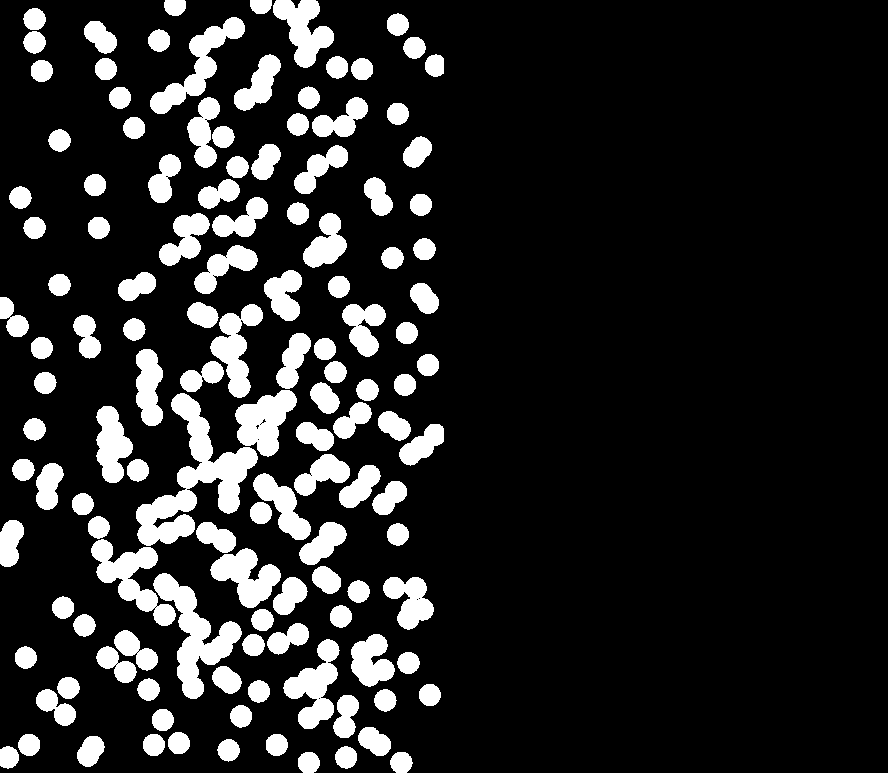

In [140]:
# making kernel
se = morp.disk(1)
for i in range(se.shape[0]):
  for j in range(se.shape[1]):
    if se[i, j] == 1:
      se[i, j] = 0
    elif se[i, j] == 0:
      se[i, j] = 1


# k = morp.disk(3)
K = np.array([[0 ,0 ,0 ,1, 0, 0, 0],
 [0 ,1, 1, 0, 1, 1, 0],
 [0 ,1, 0, 0, 0, 1, 0],
 [1 ,0, 0, 0, 0, 0, 1],
 [0 ,1, 0, 0, 0, 1, 0],
 [0 ,1, 1, 0, 1, 1, 0],
 [0 ,0, 0, 1, 0, 0, 0]], dtype='uint8')
I = cv2.imread('coins.jpg', cv2.IMREAD_GRAYSCALE)
for i in range(I.shape[0]):
  for j in range(I.shape[1]):
    if I[i,j] > 100:
      I[i,j] = 255
    else:
      I[i,j] = 0

E = cv2.erode(I, k, iterations=1)
# M = cv2.morphologyEx(E, cv2.MORPH_HITMISS, se)
D = cv2.dilate(E, k, iterations=1)
R = np.zeros_like(D)
for i in range(R.shape[0]):
  for j in range(R.shape[1]):
    if I[i,j] != D[i,j]:
      R[i,j] = 255
    else:
      R[i,j] = 0
R = cv2.erode(R, k, iterations=1)
# R = cv2.dilate(R, k, iterations=1)

cv2_imshow(np.hstack([I, R]))

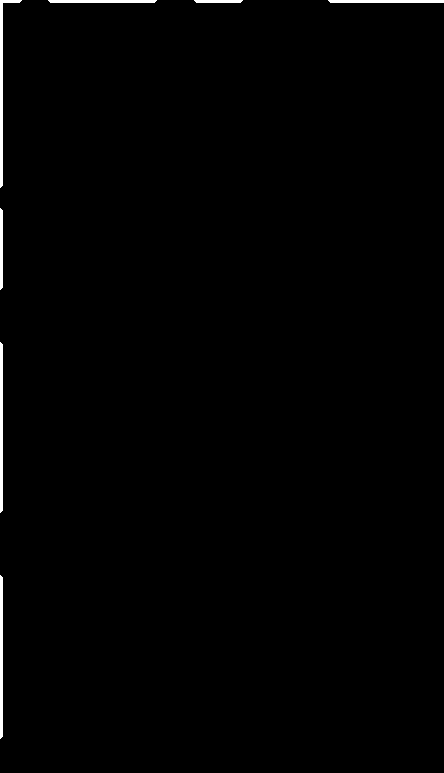

In [157]:
# read image
I = cv2.imread('coins.jpg', cv2.IMREAD_GRAYSCALE)
for i in range(I.shape[0]):
  for j in range(I.shape[1]):
    if I[i,j] > 100:
      I[i,j] = 255
    else:
      I[i,j] = 0

k1 = morp.disk(2)
k2 = -1 * np.ones((20,20))
k2[5:10, 5:10] = k1

M = cv2.morphologyEx(I, cv2.MORPH_HITMISS, k2)
D = cv2.cv2.dilate(M, k1, iterations=1)
cv2_imshow(D)

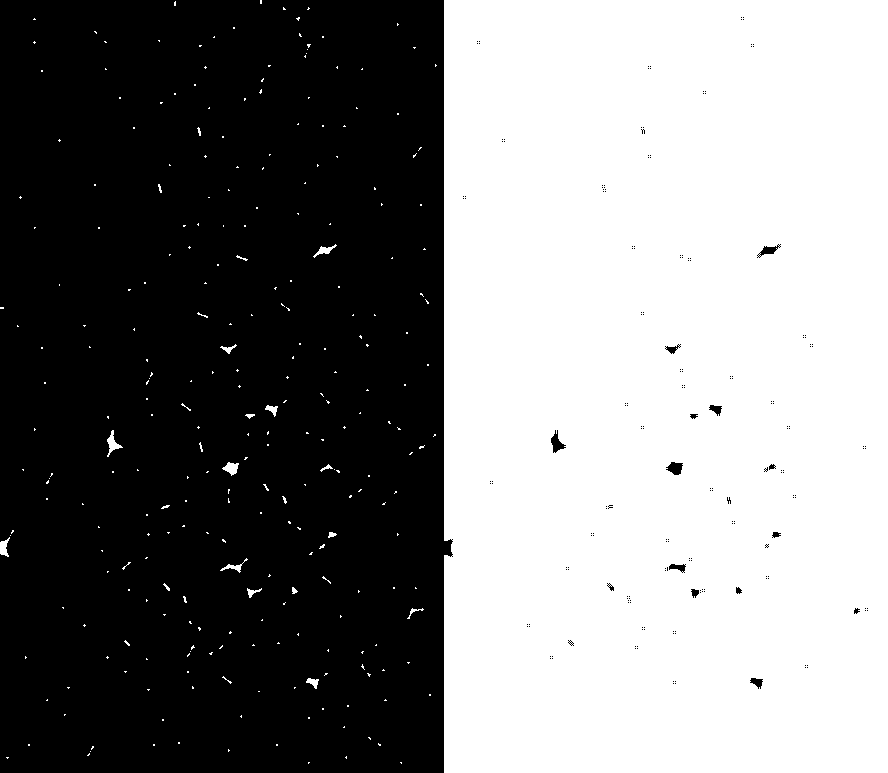

In [185]:
# read image
I = cv2.imread('coins.jpg', cv2.IMREAD_GRAYSCALE)
for i in range(I.shape[0]):
  for j in range(I.shape[1]):
    if I[i,j] > 100:
      I[i,j] = 255
    else:
      I[i,j] = 0

# read image, complement
J = cv2.imread('coins.jpg', cv2.IMREAD_GRAYSCALE)
for i in range(J.shape[0]):
  for j in range(J.shape[1]):
    if J[i,j] > 100:
      J[i,j] = 0
    else:
      J[i,j] = 255

# first erosion
k1 = morp.disk(10)
D1 = cv2.erode(I, k1, iterations=1)

#second erosion
k3 = morp.disk(11)
J = cv2.dilate(J, k3, iterations=1)
k2 = morp.disk(2)[1:-1, 1:-1] - morp.disk(1)
D2 = cv2.erode(J, k2, iterations=1)

cv2_imshow(np.hstack([D1, D2]))
